<a href="https://colab.research.google.com/github/vanunci/Colab-Research/blob/main/Pratica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow


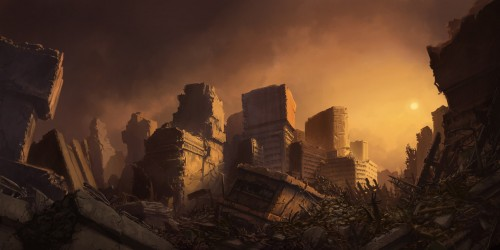

In [ ]:
#abria a imagem
img = cv2.imread('data/t1.jpg',1)
cv2_imshow(img)

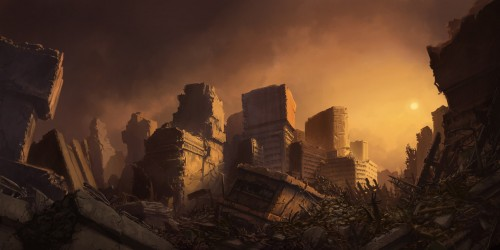

In [ ]:
#mostrando a imagem colorida
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

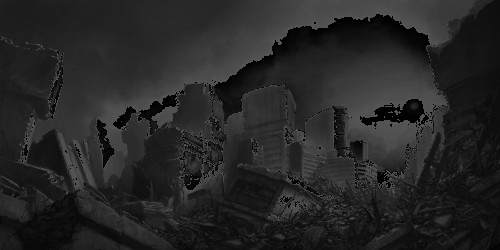

In [ ]:
#aplicando conversão básica
#numpy
img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B+G+R)/3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2_imshow(img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

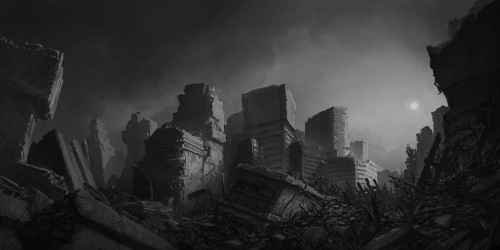

In [ ]:
#aplicando conversão ponderada
img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2_imshow(img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_grayscale_pondered.shape

(250, 500)

## Histograma de uma imagem

In [ ]:
histogram = np.zeros(256)
for i in range(img_grayscale_pondered.shape[0]):
    for j in range(img_grayscale_pondered.shape[1]):
        histogram[img_grayscale_pondered[i,j]] += 1

print(histogram[100])

269.0


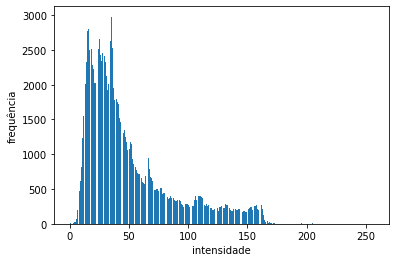

In [ ]:
x = np.linspace(0,256,256)
plt.bar(x,histogram)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

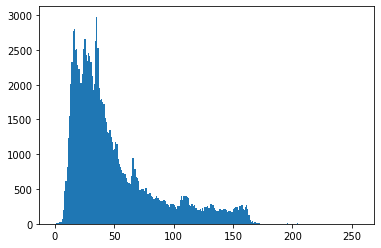

In [ ]:
plt.hist(img_grayscale_pondered.ravel(),256,[0,256])
plt.show()

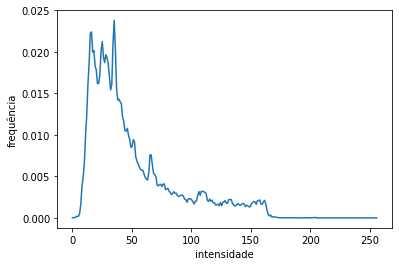

In [ ]:
histogram_normalized = histogram/(img_grayscale_pondered.shape[0]*img_grayscale_pondered.shape[1])

x = np.linspace(0,256,256)
plt.plot(x,histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

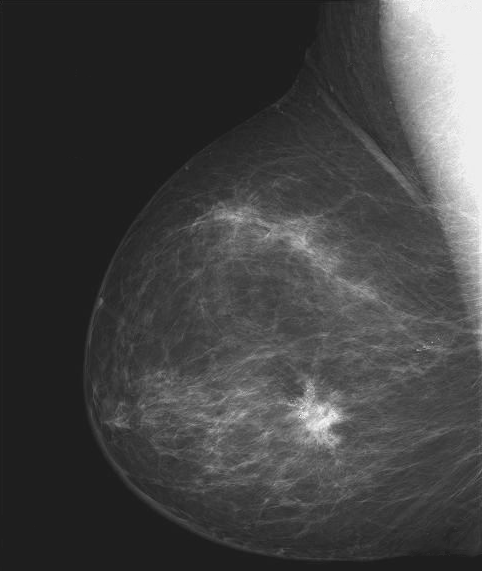

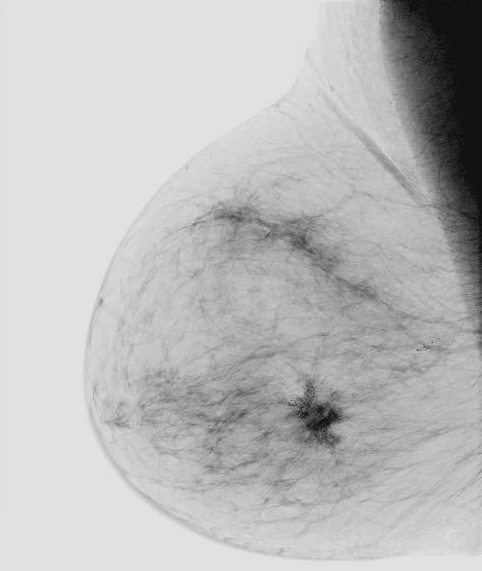

In [ ]:
#negativo

#img_negative[ : , : ,0] = 255 - img[ : , : ,0]
#img_negative[ : , : ,1] = 255 - img[ : , : ,1]
#img_negative[ : , : ,2] = 255 - img[ : , : ,2]

img_in = cv2.imread('data/Fig0304(a)(breast_digital_Xray).tif',1)


img_out = 255 - img_in

cv2_imshow(img_in)
cv2.waitKey(0)
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

250.075


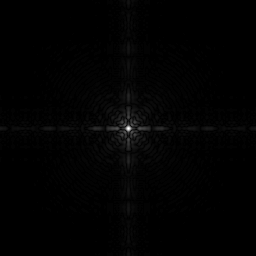

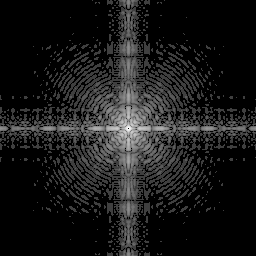

In [ ]:
#logaritimica 
img_in = cv2.imread('data/Fig0305(a)(DFT_no_log).tif',0)

c = 255/(np.log(1 + np.max(img_in)))
img_out = np.array((c * np.log(1 + img_in + 0.000001)), dtype=np.float32)


print(img_out.max())
cv2_imshow(img_in)
cv2.waitKey(0)
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

80.03478


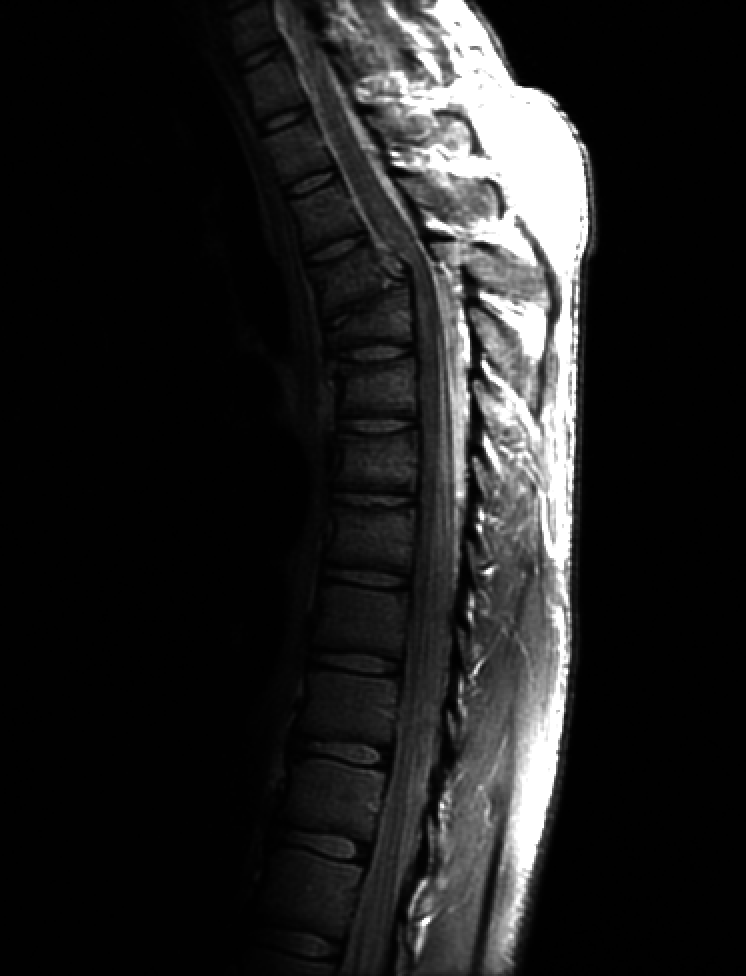

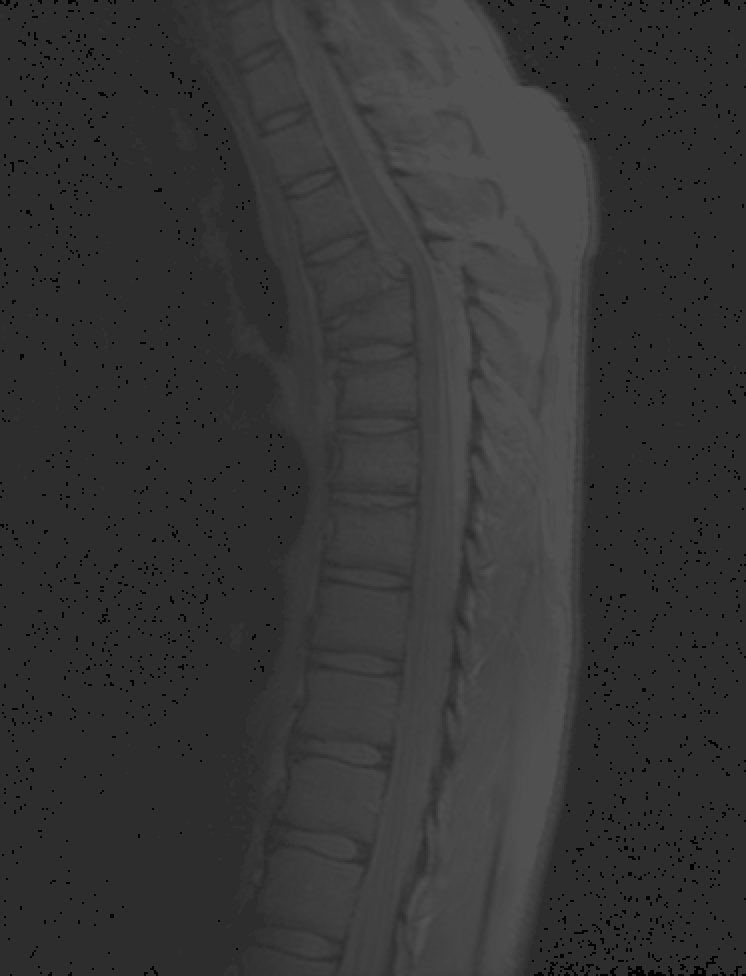

In [ ]:
#gamma 
img_in = cv2.imread('data/Fig0308(a)(fractured_spine).tif',0)

c = 255/(np.log(1 + np.max(img_in)))
gamma = 0.1
img_out = np.array(c*255*(img_in/255)**gamma, dtype = np.uint8)
img_out = np.array(c*(img_in)**gamma, dtype = np.float32)

print(img_out.max())
cv2_imshow(img_in)
cv2.waitKey(0)
cv2_imshow(img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#alargamento de contraste
img_in = cv2.imread('data/Fig0310(b)(washed_out_pollen_image).tif',0)

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] <= 85:
            img_out[i,j] = img_in[i,j]/2
        if img_in[i,j] > 85 or img_in[i,j] < 170:
            img_out[i,j] = 2*img_in[i,j] - 127
        if img_in[i,j] >= 170:
            img_out[i,j] = img_in[i,j]/2 + 128
            
img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#contraste e brilho
img_in = cv2.imread('data/t1.jpg',0)
a = -1
b = 1

img_out = a*img_in + b

img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#limiar
img_in = cv2.imread('data/t1.jpg',0)

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] < 127 :
            img_out[i,j] = 0
        else:
            img_out[i,j] = 255 #img_in[i,j]

img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('data/Fig0312(a)(kidney).tif',0)

a = 50
b = 100

img_out = np.zeros(img_in.shape)

for i in range(img_in.shape[0]):
    for j in range(img_in.shape[1]):
        if img_in[i,j] <= a or img_in[i,j] >= b:
            img_out[i,j] = 255
        if img_in[i,j] > a and img_in[i,j] < b:
            img_out[i,j] = img_in[i,j]
            
img_out = np.array(img_out, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtro Espacial

In [ ]:
#suavização
img_in = cv2.imread('data/Fig0333(a)(test_pattern_blurring_orig).tif',0)

kernel = np.ones((5,5),np.float32)/25

img_out_1 = cv2.filter2D(img_in,-1,kernel)

img_out_2 = cv2.blur(img_in,(5,5))

img_out_3 = cv2.GaussianBlur(img_in,(5,5),0)

img_out_4 = cv2.medianBlur(img_in,5)

cv2.imshow('in', img_in)
cv2.waitKey(0)
#cv2.imshow('out1', img_out_1)
#cv2.waitKey(0)
#cv2.imshow('out2', img_out_2)
#cv2.waitKey(0)
cv2.imshow('out2', img_out_3)
cv2.waitKey(0)
cv2.imshow('out2', img_out_4)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
#sharpening

#laplaciano
img_in = cv2.imread('data/Fig0338(a)(blurry_moon).tif',0)

#kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
#img_out = cv2.filter2D(img_in,-1,kernel)
img_out_parcial = cv2.filter2D(img_in,-1,kernel)
img_out = img_in + img_out_parcial

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out1', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


<class 'numpy.ndarray'>


In [ ]:
#sharpening

#Unsharp Masking e Highboost Filtering

img_in = cv2.imread('data/Fig0340(a)(dipxe_text).tif',0)

# Blur the image
gauss = cv2.GaussianBlur(img_in, (7,7), 0)

# Apply Unsharp masking
img_out = cv2.addWeighted(img_in, 2, gauss, -1, 0)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out1', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#sharpening borda
img_in = cv2.imread('data/Fig0342(a)(contact_lens_original).tif',0)

#laplaciano
kernel = np.array([[-1,-1,-1,],[-1,8,-1],[-1,-1,-1]])
img_out_lap = cv2.filter2D(img_in,-1,kernel)

#gradiente Sobel

kernel1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernel2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_out_r1 = cv2.filter2D(img_in,-1,kernel1)
#img_out_r1 = np.array(img_out_r1, dtype = np.uint8)

img_out_r2 = cv2.filter2D(img_in,-1,kernel2)
#img_out_r2 = np.array(img_out_r2, dtype = np.uint8)


img_out_sobel = np.array(np.sqrt((img_out_r1**2) + (img_out_r2**2)), dtype = np.float32)
img_out_sobel = np.array((np.sqrt(img_out_r1) + np.sqrt(img_out_r2)), dtype = np.float32)

#img_out_sobel = np.abs(img_out_r1) + np.abs(img_out_r2)
#img_out_sobel = np.array(img_out_sobel, dtype = np.uint8)

#img_out_sobel = cv2.Sobel(gauss,-1,1,1,ksize=5)


cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out1', img_out_lap)
cv2.waitKey(0)
cv2.imshow('out2', img_out_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#robert
kernel1 = np.array([[-1,0,],[0,1]])
kernel2 = np.array([[0,-1,],[1,0]])
img_out_r1 = cv2.filter2D(img_in,-1,kernel1)
img_out_r2 = cv2.filter2D(img_in,-1,kernel2)

#img_out_r = np.sqrt(img_out_r1) + np.sqrt(img_out_r2)

img_out_r = np.sqrt((img_out_r1**2)+(img_out_r2**2))
img_out_r = np.array(img_out_r, dtype = np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out1', img_out_r)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'np' is not defined